In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#importing the data set sleepDay
sleepDay = pd.read_csv(r"C:\Users\College\OneDrive\Documents\GitHub\Bellabeat_Google_Data_Analytics_Capstone_Project\Fitabase Data 4.12.16-5.12.16\sleepDay_merged.csv")

In [3]:
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


remove duplicates

In [4]:
sleepDay.duplicated().sum()

3

In [5]:
sleepDay = sleepDay.drop_duplicates()

In [6]:
sleepDay.duplicated().sum()

0

In [7]:
# calculating the total mins taken to fall asleep
sleepDay['TimeTakenToSleep_min'] = sleepDay['TotalTimeInBed'] - sleepDay['TotalMinutesAsleep']
sleepDay.head()
#sleepDay = sleepDay.drop(['Total_Time_Slept'],axis = 1)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TimeTakenToSleep_min
0,1503960366,4/12/2016 12:00:00 AM,1,327,346,19
1,1503960366,4/13/2016 12:00:00 AM,2,384,407,23
2,1503960366,4/15/2016 12:00:00 AM,1,412,442,30
3,1503960366,4/16/2016 12:00:00 AM,2,340,367,27
4,1503960366,4/17/2016 12:00:00 AM,1,700,712,12


In [8]:
sleepDay.dtypes

Id                       int64
SleepDay                object
TotalSleepRecords        int64
TotalMinutesAsleep       int64
TotalTimeInBed           int64
TimeTakenToSleep_min     int64
dtype: object

In [9]:
# converting the TotalHoursAsleep and TotalHoursInBed to Hours
sleepDay['TotalHoursAsleep'] = round((sleepDay['TotalMinutesAsleep'])/60,2)
sleepDay['TotalHoursInBed'] = round((sleepDay['TotalTimeInBed'])/60,2)
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TimeTakenToSleep_min,TotalHoursAsleep,TotalHoursInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346,19,5.45,5.77
1,1503960366,4/13/2016 12:00:00 AM,2,384,407,23,6.40,6.78
2,1503960366,4/15/2016 12:00:00 AM,1,412,442,30,6.87,7.37
3,1503960366,4/16/2016 12:00:00 AM,2,340,367,27,5.67,6.12
4,1503960366,4/17/2016 12:00:00 AM,1,700,712,12,11.67,11.87


In [10]:
#dropping columns that wont be used
sleepDay = sleepDay.drop(['TotalMinutesAsleep','TotalTimeInBed'],axis = 1)
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TimeTakenToSleep_min,TotalHoursAsleep,TotalHoursInBed
0,1503960366,4/12/2016 12:00:00 AM,1,19,5.45,5.77
1,1503960366,4/13/2016 12:00:00 AM,2,23,6.40,6.78
2,1503960366,4/15/2016 12:00:00 AM,1,30,6.87,7.37
3,1503960366,4/16/2016 12:00:00 AM,2,27,5.67,6.12
4,1503960366,4/17/2016 12:00:00 AM,1,12,11.67,11.87


In [11]:
# rearranging the columns
sleepDay = sleepDay[['Id','SleepDay','TotalSleepRecords','TotalHoursInBed','TotalHoursAsleep','TimeTakenToSleep_min']]

In [12]:
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalHoursInBed,TotalHoursAsleep,TimeTakenToSleep_min
0,1503960366,4/12/2016 12:00:00 AM,1,5.77,5.45,19
1,1503960366,4/13/2016 12:00:00 AM,2,6.78,6.40,23
2,1503960366,4/15/2016 12:00:00 AM,1,7.37,6.87,30
3,1503960366,4/16/2016 12:00:00 AM,2,6.12,5.67,27
4,1503960366,4/17/2016 12:00:00 AM,1,11.87,11.67,12


In [13]:
type(sleepDay['SleepDay'][0])

str

In [14]:
# converting the datatype of SleepDay to datetime
sleepDay['SleepDay'] = pd.to_datetime(sleepDay['SleepDay'])

In [15]:
type(sleepDay['SleepDay'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
sleepDay.rename(columns = {'SleepDay':'ActivityDate'}, inplace = True)
sleepDay.columns

Index(['Id', 'ActivityDate', 'TotalSleepRecords', 'TotalHoursInBed',
       'TotalHoursAsleep', 'TimeTakenToSleep_min'],
      dtype='object')

In [17]:
sleepDay['TotalHoursAsleep'].isnull().sum()

0

In [18]:
# Anlysis the sleep quality on the basis of number of hours slept

sleepDay['SleepQuality'] = 'Unknown'
#sleepDay.loc[(sleepDay['TotalHoursAsleep'] >= 6).all() and (sleepDay['TotalHoursAsleep']<= 8).all(), 'SleepQuality'] = 'Sufficient'
sleepDay['SleepQuality'] = np.where((sleepDay['TotalHoursAsleep'] >=6).any() and (sleepDay['TotalHoursAsleep'] <= 8).any(), 'Sufficient', 'Unknown')

sleepDay.loc[sleepDay['TotalHoursAsleep'] < 6 , 'SleepQuality'] = 'Insufficient'
sleepDay.loc[sleepDay['TotalHoursAsleep'] > 8 , 'SleepQuality'] = 'Oversleeping'


In [19]:
sleepDay.isnull().sum()

Id                      0
ActivityDate            0
TotalSleepRecords       0
TotalHoursInBed         0
TotalHoursAsleep        0
TimeTakenToSleep_min    0
SleepQuality            0
dtype: int64

In [20]:
sleepDay = sleepDay.dropna()

In [21]:
sleepDay

,Id,ActivityDate,TotalSleepRecords,TotalHoursInBed,TotalHoursAsleep,TimeTakenToSleep_min,SleepQuality
0,1503960366,2016-04-12,1,5.77,5.45,19,Insufficient
1,1503960366,2016-04-13,2,6.78,6.40,23,Sufficient
2,1503960366,2016-04-15,1,7.37,6.87,30,Sufficient
3,1503960366,2016-04-16,2,6.12,5.67,27,Insufficient
4,1503960366,2016-04-17,1,11.87,11.67,12,Oversleeping
...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,1,6.00,5.72,17,Insufficient
409,8792009665,2016-05-01,1,8.78,8.38,24,Oversleeping
410,8792009665,2016-05-02,1,7.05,6.92,8,Sufficient
411,8792009665,2016-05-03,1,9.08,8.60,29,Oversleeping


In [22]:
# seeing overall sleep quality of the users
sleepday_plot = sleepDay['SleepQuality'].value_counts()
sleepday_plot

Sufficient      196
Oversleeping    114
Insufficient    100
Name: SleepQuality, dtype: int64

<AxesSubplot:title={'center':'Comparing Quality of Sleep'}>

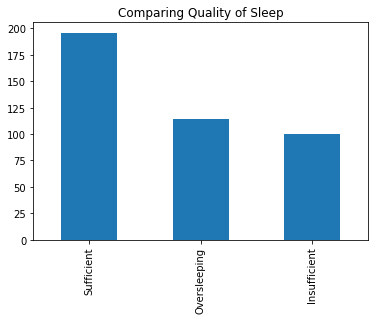

In [23]:
#visualising it
sleepday_plot.plot(kind = 'bar', title = 'Comparing Quality of Sleep')

In [33]:
#importing the dataset dailyActivity_merged
dailyActivity_merged = pd.read_csv(r"C:\Users\College\Desktop\Projects\Bellabeat\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv")

In [34]:
dailyActivity_merged['ActivityDate'] = pd.to_datetime(sleepDay['ActivityDate'])

In [35]:
dailyActivity_merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-15,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-16,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-17,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [36]:
# analysing the user activity if its VeryActive,Active, Average or Inactive on the basis of total steps
dailyActivity_merged['User_Activity'] = 'Unknown'

dailyActivity_merged.loc[dailyActivity_merged['TotalSteps'] >= 12500, 'User_Activity'] = 'VeryActive'
dailyActivity_merged.loc[(dailyActivity_merged['TotalSteps'] >= 8000) & (dailyActivity_merged['TotalSteps'] < 12500), 'User_Activity'] = 'Active'
dailyActivity_merged.loc[(dailyActivity_merged['TotalSteps'] >= 5000) & (dailyActivity_merged['TotalSteps'] < 8000), 'User_Activity'] = 'Average'
dailyActivity_merged.loc[dailyActivity_merged['TotalSteps'] < 5000, 'User_Activity'] = 'Inactive'
dailyActivity_merged

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,User_Activity
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,VeryActive
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,Active
2,1503960366,2016-04-15,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,Active
3,1503960366,2016-04-16,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,Active
4,1503960366,2016-04-17,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,VeryActive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,NaT,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,Active
936,8877689391,NaT,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,VeryActive
937,8877689391,NaT,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,Active
938,8877689391,NaT,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,VeryActive


In [37]:
# seeing the overall activity
user_activity_plot = dailyActivity_merged['User_Activity'].value_counts()
user_activity_plot


Inactive      303
Active        289
Average       204
VeryActive    144
Name: User_Activity, dtype: int64

<AxesSubplot:title={'center':'Visualising how active the users are'}>

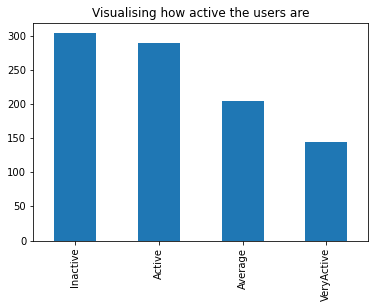

In [38]:
# visualising 
user_activity_plot.plot(kind = 'bar', title = 'Visualising how active the users are')

In [39]:
df = pd.merge(dailyActivity_merged,sleepDay,on = ['Id','ActivityDate'],how = 'inner')
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,User_Activity,TotalSleepRecords,TotalHoursInBed,TotalHoursAsleep,TimeTakenToSleep_min,SleepQuality
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,VeryActive,1,5.77,5.45,19,Insufficient
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,1797,Active,2,6.78,6.40,23,Sufficient
2,1503960366,2016-04-15,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,11,181,1218,1776,Active,1,7.37,6.87,30,Sufficient
3,1503960366,2016-04-15,12770,8.13,8.13,0.0,2.56,1.01,4.55,0.0,...,23,251,669,1783,VeryActive,1,7.37,6.87,30,Sufficient
4,1503960366,2016-04-16,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,1745,Active,2,6.12,5.67,27,Insufficient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,4319703577,2016-04-15,9261,6.24,6.24,0.0,0.00,0.44,5.71,0.0,...,11,344,585,2270,Active,1,8.18,7.75,26,Sufficient
128,4319703577,2016-04-20,9648,6.47,6.47,0.0,0.58,1.07,4.83,0.0,...,26,287,669,2235,Active,1,9.05,8.72,20,Oversleeping
129,4319703577,2016-04-22,10429,7.02,7.02,0.0,0.59,0.58,5.85,0.0,...,13,313,1106,2282,Active,1,9.17,8.88,17,Oversleeping
130,4319703577,2016-04-23,13658,9.49,9.49,0.0,2.63,1.41,5.45,0.0,...,34,328,957,2530,VeryActive,1,12.03,11.53,30,Oversleeping


In [40]:
# extracting only relevant columns
df1 = df[['Id','ActivityDate','User_Activity','SleepQuality']]

In [41]:
df1

,Id,ActivityDate,User_Activity,SleepQuality
0,1503960366,2016-04-12,VeryActive,Insufficient
1,1503960366,2016-04-13,Active,Sufficient
2,1503960366,2016-04-15,Active,Sufficient
3,1503960366,2016-04-15,VeryActive,Sufficient
4,1503960366,2016-04-16,Active,Insufficient
...,...,...,...,...
127,4319703577,2016-04-15,Active,Sufficient
128,4319703577,2016-04-20,Active,Oversleeping
129,4319703577,2016-04-22,Active,Oversleeping
130,4319703577,2016-04-23,VeryActive,Oversleeping


In [42]:
#grouping by User_Activity and SleepQuality
df2 = df1.groupby(['User_Activity','SleepQuality']).size().reset_index(name='Count')
df2

,User_Activity,SleepQuality,Count
0,Active,Insufficient,25
1,Active,Oversleeping,12
2,Active,Sufficient,14
3,Average,Insufficient,4
4,Average,Oversleeping,11
5,Average,Sufficient,3
6,Inactive,Insufficient,7
7,Inactive,Oversleeping,20
8,Inactive,Sufficient,11
9,VeryActive,Insufficient,15


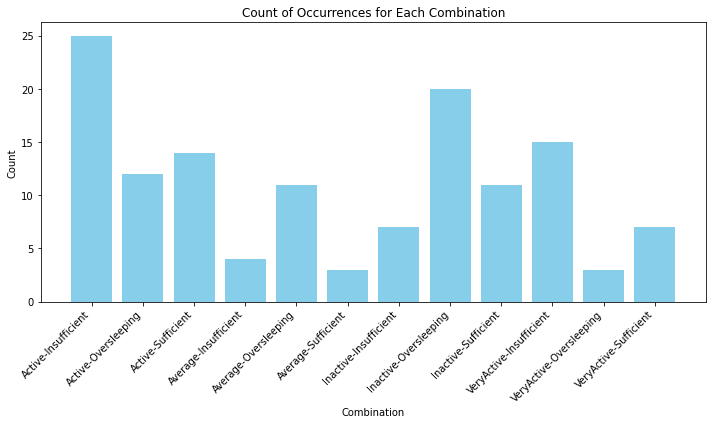

In [43]:
#graph
plt.figure(figsize=(10, 6))
plt.bar(df2.index, df2['Count'], color='skyblue')
plt.xlabel('Combination')
plt.ylabel('Count')
plt.title('Count of Occurrences for Each Combination')
plt.xticks(df2.index, [f'{act}-{quality}' for act, quality in zip(df2['User_Activity'], df2['SleepQuality'])], rotation=45, ha='right')
plt.tight_layout()
plt.show()